In [25]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split


In [26]:
path_to_data = "C:\\Users\\ryanz\\Documents\\CS528\\gesture_svm\\data"

data = {}
gestures = ["up", "down", "left", 'right']

for filename in os.listdir(path_to_data):
    df = pd.read_csv(path_to_data + "\\" + filename)
    df = df.reset_index().rename(columns={'index': 'Sample Num'})

    for gesture in gestures:
        if gesture in filename:
            if gesture not in data:
                data[gesture] = {filename: df}
            else:
                data[gesture][filename] = df
                
    

    


In [ ]:

max_length = 0
for gesture in data:
    for filename in data[gesture]:
        df = data[gesture][filename]
        max_length = max(max_length, df.shape[0])

X = []
y = []
scaler = MinMaxScaler()
target_length = max_length

for gesture in data:
    for filename in data[gesture]:
        df = data[gesture][filename]
        vals = df[['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z']].values.astype(np.float32)
        
        vals = scaler.fit_transform(vals)
        
        #pad arrays with zeros
        if vals.shape[0] < target_length:
            padding = np.zeros((target_length - vals.shape[0], vals.shape[1]))
            vals = np.vstack((vals, padding))
        else:
            vals = vals[:target_length, :]
        
        X.append(vals.flatten())
        y.append(gesture)

X = np.array(X)
y = np.array(y)


In [29]:
def train_svm(X, y):
    skf = StratifiedKFold(n_splits=5, shuffle=True)
    le = LabelEncoder()
    accuracies = []
    precisions = []
    recalls = []
    f1s = []
    for i, (train_index, test_index) in enumerate(skf.split(X, y)):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        
        svm_classifier = SVC(kernel='rbf')
        svm_classifier.fit(X_train, y_train)
        
        y_pred = svm_classifier.predict(X_test)
        
        y_test_encoded = le.fit_transform(y_test)
        y_pred_encoded = le.transform(y_pred)
        
        
        accuracies.append(accuracy_score(y_test_encoded, y_pred_encoded))
        precisions.append(precision_score(y_test_encoded, y_pred_encoded, average='macro'))
        recalls.append(recall_score(y_test_encoded, y_pred_encoded, average='macro'))
        f1s.append(f1_score(y_test_encoded, y_pred_encoded, average='macro'))
        
        
        
        
        print(f"Fold {i} accuracy: {accuracy_score(y_test_encoded, y_pred_encoded)}")
        
        conf_matrix = confusion_matrix(y_test, y_pred)
        sns.heatmap(conf_matrix, annot=True, cmap="Blues", xticklabels=gestures, yticklabels=gestures)
        plt.title('train')
        plt.xlabel('pred')
        plt.ylabel('actual')
        plt.show()
        
    return accuracies, precisions, recalls, f1s

### SVM

Fold 0 accuracy: 0.9411764705882353


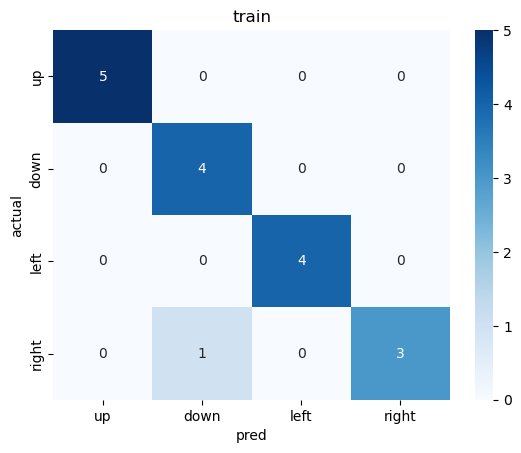

Fold 1 accuracy: 0.8823529411764706


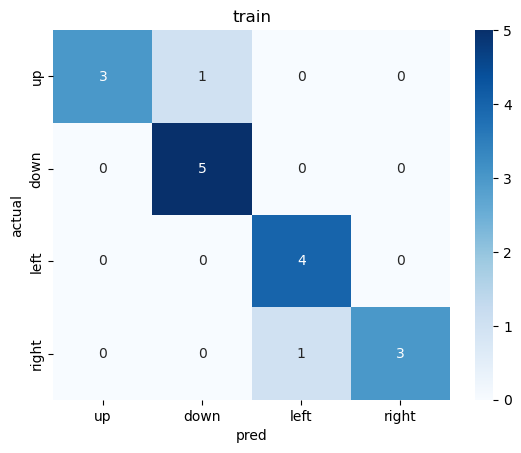

Fold 2 accuracy: 1.0


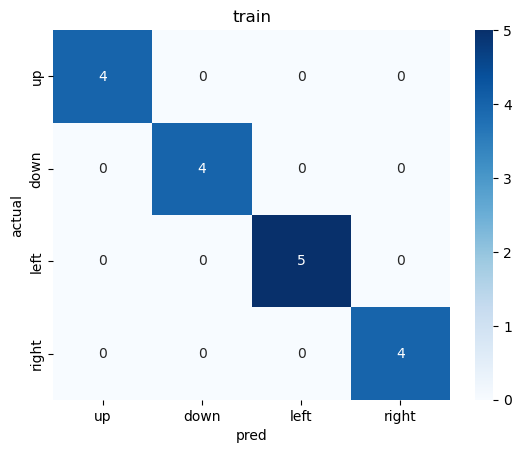

Fold 3 accuracy: 0.9411764705882353


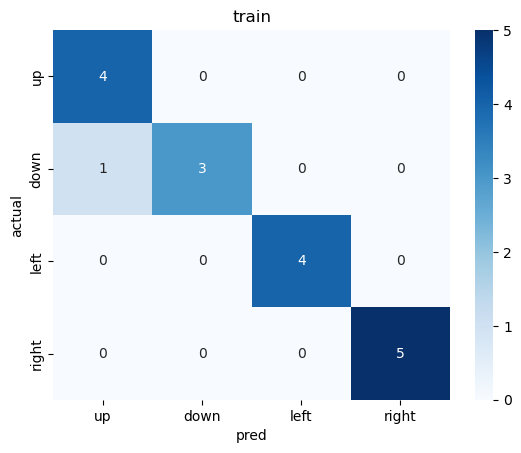

Fold 4 accuracy: 0.9375


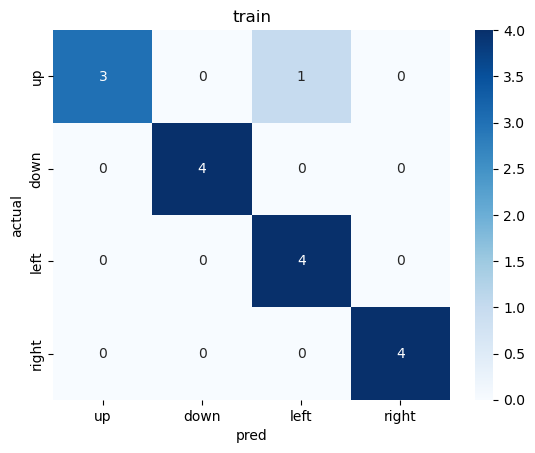

Average Accuracy Score: 0.9404411764705882
Average Precision Score: 0.9516666666666668
Average Recall Score: 0.9375
Average F1 Score: 0.9375180375180376


In [31]:
# Perform training and testing with SVM
accuracies, precisions, recalls, f1s = train_svm(X, y)

avgAcc = np.mean(accuracies)
avgPrec = np.mean(precisions)
avgRec = np.mean(recalls)
avgF1 = np.mean(f1s)

print(f"Average Accuracy Score: {avgAcc}")
print(f"Average Precision Score: {avgPrec}")
print(f"Average Recall Score: {avgRec}")
print(f"Average F1 Score: {avgF1}")
